# Построение линии регрессии

Линейная регрессия — метод машинного обучения, используемый для предсказания непрерывных значений на основе одного или нескольких входных признаков. Основная идея линейной регрессии заключается в нахождении линейной зависимости между входными признаками и целевой переменной.

## Блок с используемыми библиотеками

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

## Блок с описанием и демонстрацией (частичной распечаткой) используемого датасета

In [2]:
data = pd.read_csv('./input/Iris.csv')
speciesTypes = data['Species'].unique()
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

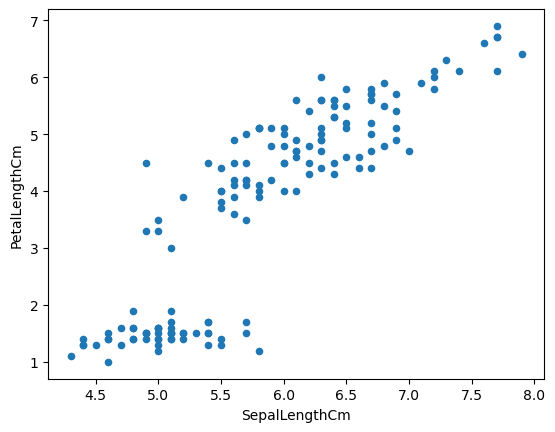

In [5]:
#Длина чашелистика vs длина лепестка
data.plot(x = 'SepalLengthCm', y = 'PetalLengthCm', kind = 'scatter')

## Блок с предварительной обработкой датасета

In [6]:
data = data.drop('Id', axis = 1)

In [7]:
species_mapping = {species: idx for idx, species in enumerate(data['Species'].unique())}
data['Species'] = data['Species'].map(species_mapping)
y = data[['Species']].copy()
data = data.drop('Species', axis = 1)

In [8]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## Блок с тепловой картой

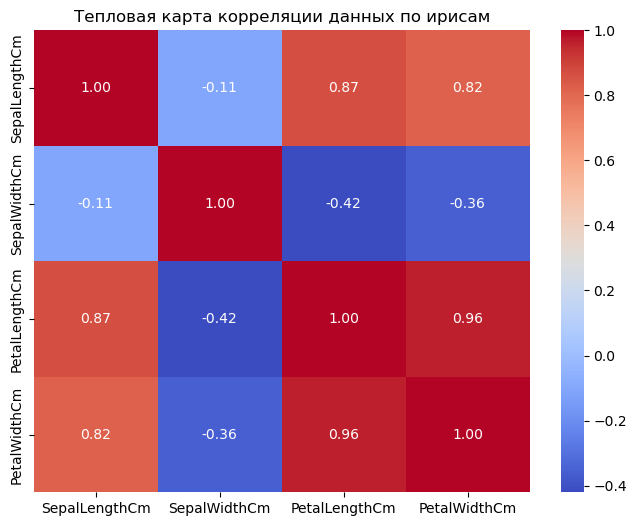

In [10]:
corr = data.corr()

# Создание тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции данных по ирисам')
plt.show()

## Блок с обучением модели

In [11]:
X = pd.DataFrame(data['SepalLengthCm'])
y = pd.DataFrame(data['PetalLengthCm'])

reg = LinearRegression().fit(X, y)

## Блок с прогнозами модели

Text(0, 0.5, 'PetalLengthCm')

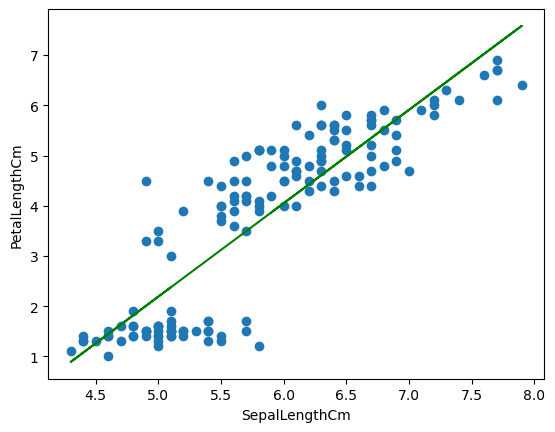

In [12]:
plt.scatter(X, y)
predicted = reg.predict(X)
plt.plot(X, predicted, color = 'g')
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")


## Блок с графиками выходных результатов

In [13]:
plt.show()

In [14]:
mse = mean_squared_error(y, predicted)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.7423201713947026


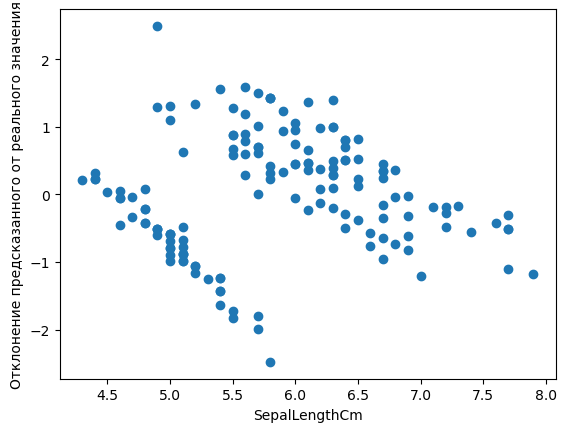

In [15]:
plt.scatter(X, y - predicted)
plt.xlabel("SepalLengthCm")
plt.ylabel("Отклонение предсказанного от реального значения")

plt.show()